<a href="https://colab.research.google.com/github/koseogluonur/-Python-for-DataScience-and-Machine-Learning-/blob/main/Exploratory_Data_Analysis%26Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Veriye İlk Bakış**

In [ ]:
#Veriseti hikayesi ve yapısının incelenmesi
import seaborn as sns
planets=sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
#Verisetinin hikayesi nedir?
#Önce bir yedeğini al
df=planets.copy()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
df.info()
#Genel bilgilere ulaşmak için kullanlır
#Object kategorik değişkeni temsil eder
#Diğer dtypelar sayısal değişkenleri temsil eder.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [ ]:
#Object yapısını kategorik değişkene dönüştürmek
import pandas as pd
df.method=pd.Categorical(df.method)

In [ ]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

**Veri Setinin Betimlenmesi**

In [ ]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
df.shape

(1035, 6)

In [ ]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [ ]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [ ]:
#Eksik değerlerin inclenmesi
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
#Verisetimizde hiç eksik değerimizz var mı?
df.isnull().values.any()

True

In [ ]:
#Hangi değişkende kaçar tane var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
#Değişkende boş olan yer için 0 ile doldurma(Mass için)
df["mass"].fillna(0,inplace=True)
df.isnull().sum()

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

In [ ]:
#Değişkende boş olan yer için ortalama ile doldurma
df["distance"].fillna(df.distance.mean(),inplace=True)
df.isnull().sum()

method             0
number             0
orbital_period    43
mass               0
distance           0
year               0
dtype: int64

In [ ]:
#Komple düzenleme yapmak
#df.fillna(0,inplace=True)
#df.fillna(df.mean(),inplace=True)

In [ ]:
#Kopyalama sayesinde geri dönebiliriz.
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

**Kategorik ve Sürekli Değişken Özetleri**

In [ ]:
cat_df=df.select_dtypes(include="object")
cat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [ ]:
#Frekansları
cat_df.value_counts()

method                       
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
dtype: int64

In [ ]:
#Sayısı
cat_df.method.unique()
cat_df["method"].value_counts().count()

10

In [ ]:
#Toplamı
cat_df["method"].value_counts().sum()

1035

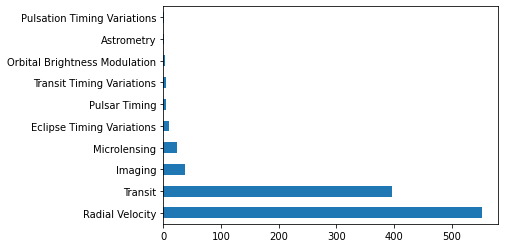

In [ ]:
#Görselleştirilmiş haliyle görmek istersek
df["method"].value_counts().plot.barh();

In [ ]:
#Sürekli değişkenler
num_df=df.select_dtypes(include= ["float64","int64"])
num_df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [ ]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [ ]:
num_df["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [ ]:
#Kendi özelleştirmelerinle değişikliklerin yapılması
print("Ortalama: "+str(num_df["distance"].mean()))


Ortalama: 264.06928217821786


In [ ]:
print("Maksimum Değer: "+str(num_df["distance"].max()))

Maksimum Değer: 8500.0


In [ ]:
print("Minimum Değer: "+str(num_df["distance"].min()))

Minimum Değer: 1.35


**Veri Seti Hikayesi**

In [ ]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [ ]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
#Ordinal tanımlama(Categoric değişkenin soıralı değerlere sahip olması durumu)
from pandas.api.types import CategoricalDtype

In [ ]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
df.cut=df.cut.astype(dtype=CategoricalDtype(ordered=True))
df.cut.head()
#Ancak sıralama yanlış geldi.Bu yüzden sıralama bilgisi gerekir.

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [ ]:
cut_categoric=["Fair","Good","Very Good","Premium","Ideal"]

In [ ]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_categoric,ordered=True))
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

**Grafik ve Barlar**

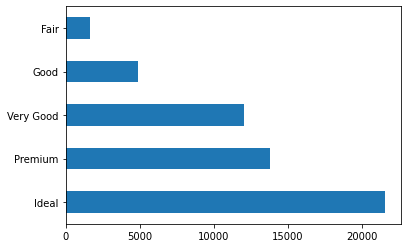

In [ ]:
#Barplot(Categoric variables)
#Pandas ile yapma
df.cut.value_counts().plot.barh();

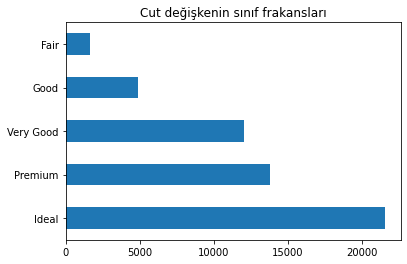

In [ ]:
df.cut.value_counts().plot.barh().set_title("Cut değişkenin sınıf frakansları");

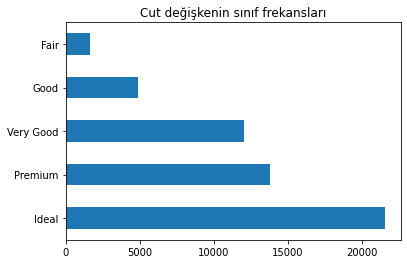

In [ ]:
#Uzun kodları daha anlaşılır hale getirmek
(df.cut
 .value_counts()
 .plot.barh()
 .set_title("Cut değişkenin sınıf frekansları"));

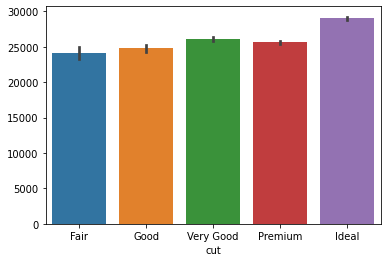

In [ ]:
#Seaborn ile yapma
#High level,daha anlaşılır ve istenilen format
sns.barplot(x="cut",y=df.cut.index,data=df);

In [ ]:
#Çaprazlamalar(Değişkenler arası değerlendirme)
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
cut_categoric=["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_categoric,ordered=True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


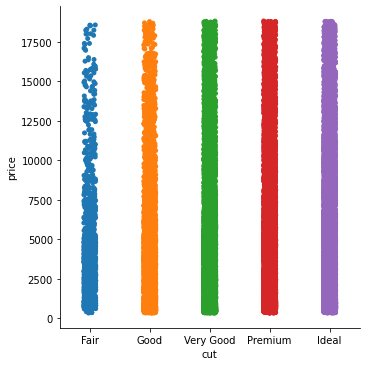

In [ ]:
sns.catplot(x="cut",y="price",data=df);

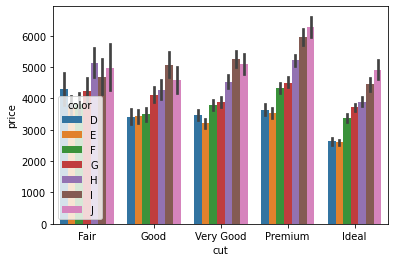

In [ ]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [ ]:
#Bu Grafiği veya verilerini doğrulamak
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


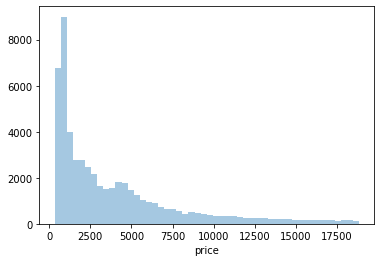

In [ ]:
#Histogram ve Yoğunluk Grafiği(Numeric variables)
sns.distplot(df.price,kde=False);

In [ ]:
?sns.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


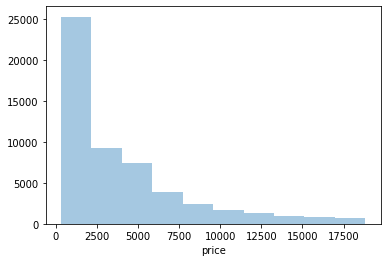

In [ ]:
sns.distplot(df.price,bins=10,kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


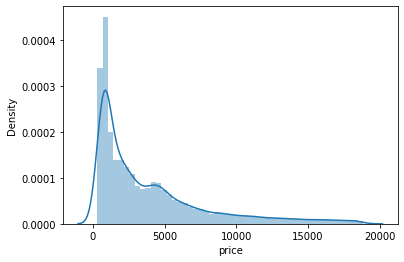

In [ ]:
sns.distplot(df.price,kde=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


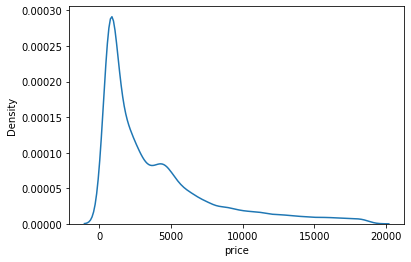

In [ ]:
#Sadece yoğunluk
sns.distplot(df.price,hist=False);

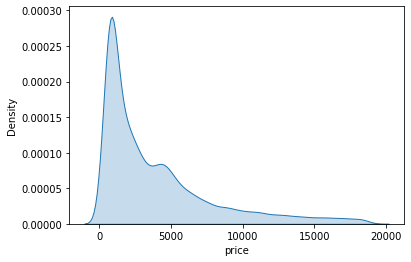

In [ ]:
sns.kdeplot(df.price,shade=True);

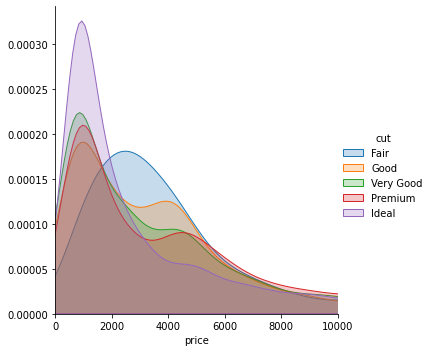

In [ ]:
#Histogram ve Yoğunluk Çaprazlamalar
#Arka planı anlamak ve nasıl oluşmuş sorusuna cevap için
(sns
 .FacetGrid(df,
               hue="cut",
               height=5,
               xlim=(0,10000))
.map(sns.kdeplot,"price",shade=True)
.add_legend()
);


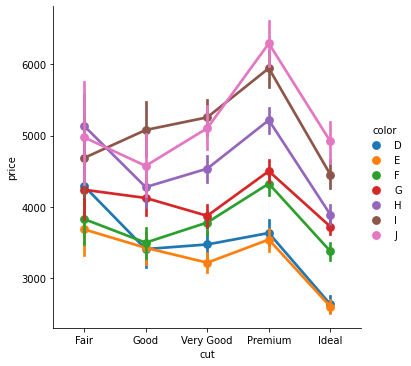

In [ ]:
sns.catplot(x="cut"
             ,y="price"
             ,hue="color"
             ,kind="point"
             ,data=df);

In [1]:
#Boxplot(Numeric variables)
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [6]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [7]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

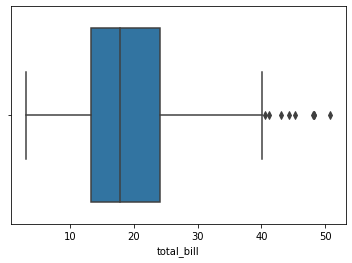

In [10]:
sns.boxplot(x=df["total_bill"]);

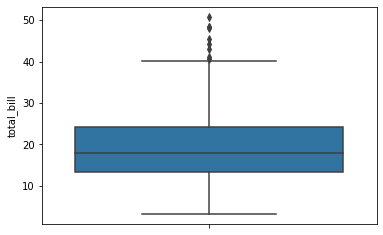

In [18]:
sns.boxplot(y=df["total_bill"], orient="v");

In [19]:
#Boxplot Çaprazlamalar
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


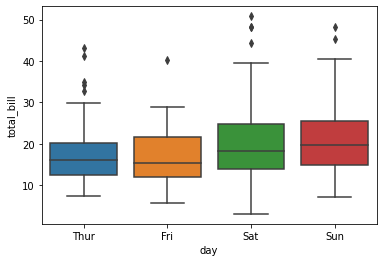

In [25]:
#Hangi günler daha fazla kazanıyoruz
sns.boxplot(x="day",y="total_bill",data=df);

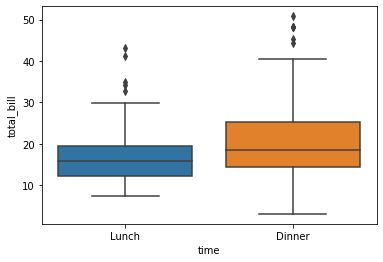

In [26]:
#Sabah mı akşam mı daha çok kazanıyoruz
sns.boxplot(x="time",y="total_bill",data=df);

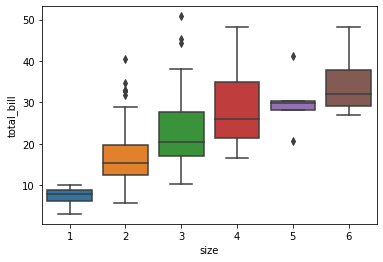

In [27]:
#Kişi sayısı ve kazanç tutarlı mı
sns.boxplot(x="size",y="total_bill",data=df);

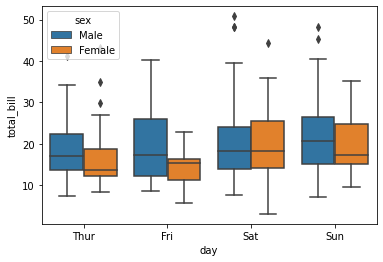

In [30]:
#Cinsiyete göre hesap miktarı
sns.boxplot(x="day",y="total_bill",hue="sex",data=df);

In [ ]:
#Violin Plot(Numeric variable)
#Yoğunluk ve boxplot grafiği kesişimi gibidir.

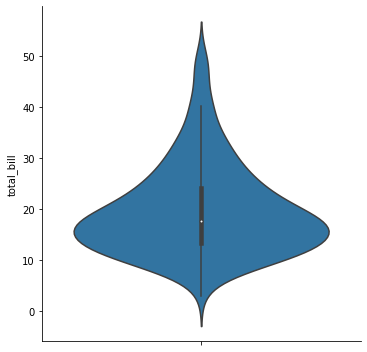

In [31]:
sns.catplot(y="total_bill",kind="violin",data=df);

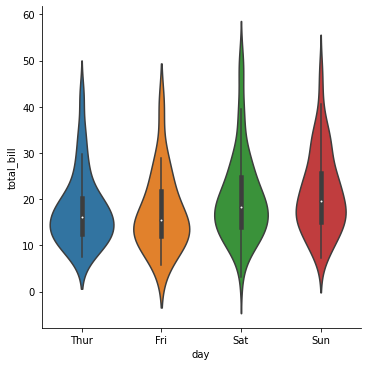

In [32]:
#Violin Çaprazlamalar
sns.catplot(x="day",y="total_bill",kind="violin",data=df);

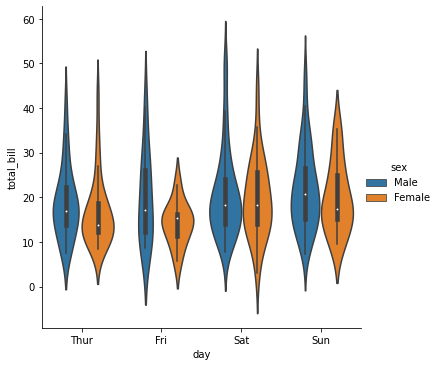

In [33]:
sns.catplot(x="day",y="total_bill",hue="sex",kind="violin",data=df);C

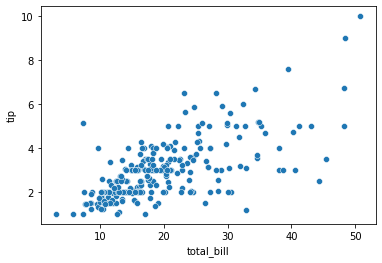

In [34]:
#Correlation Graphs
sns.scatterplot(x="total_bill",y="tip",data=df);

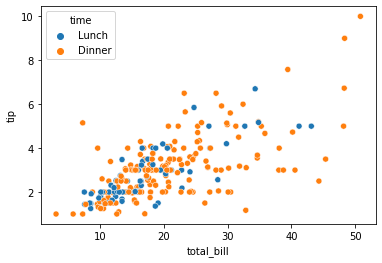

In [35]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

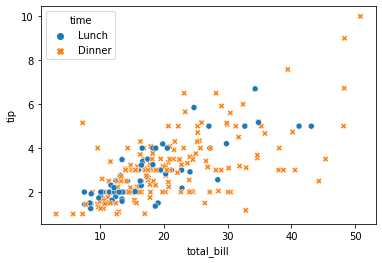

In [36]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df);

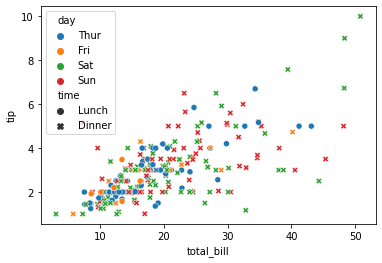

In [37]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df);

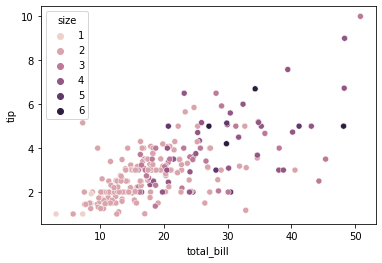

In [43]:
sns.scatterplot(x="total_bill",y="tip",hue="size",data=df);

In [45]:
#Linear ilişkinin Gösterilmesi
import seaborn as sns
import matplotlib.pyplot as plt  

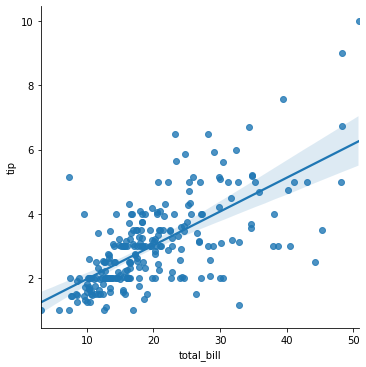

In [46]:
sns.lmplot(x="total_bill",y="tip",data=df);

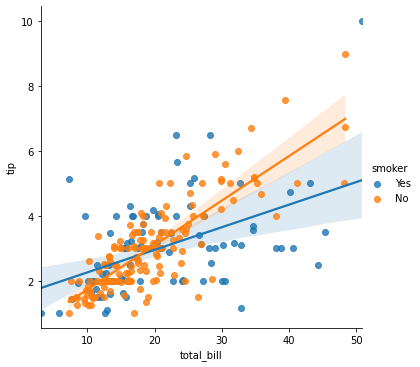

In [47]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);

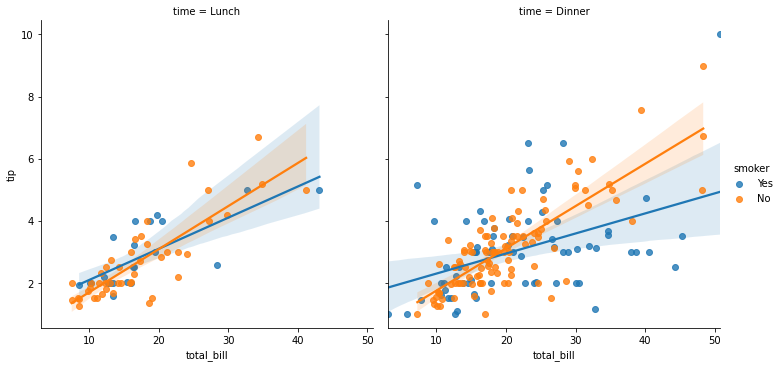

In [48]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df);

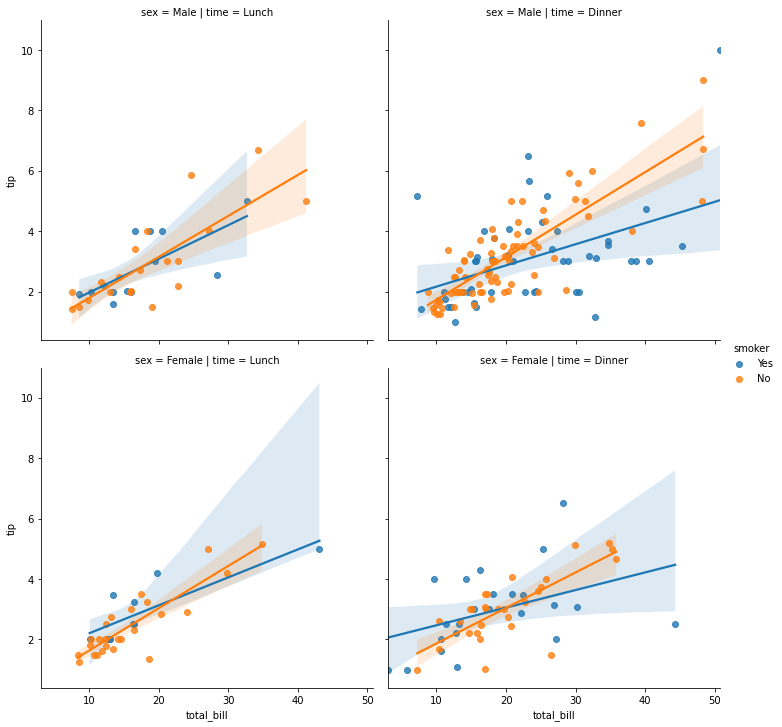

In [49]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df);

In [51]:
#ScatterPlot Matrix
import seaborn as sns
iris=sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df.shape

(150, 5)

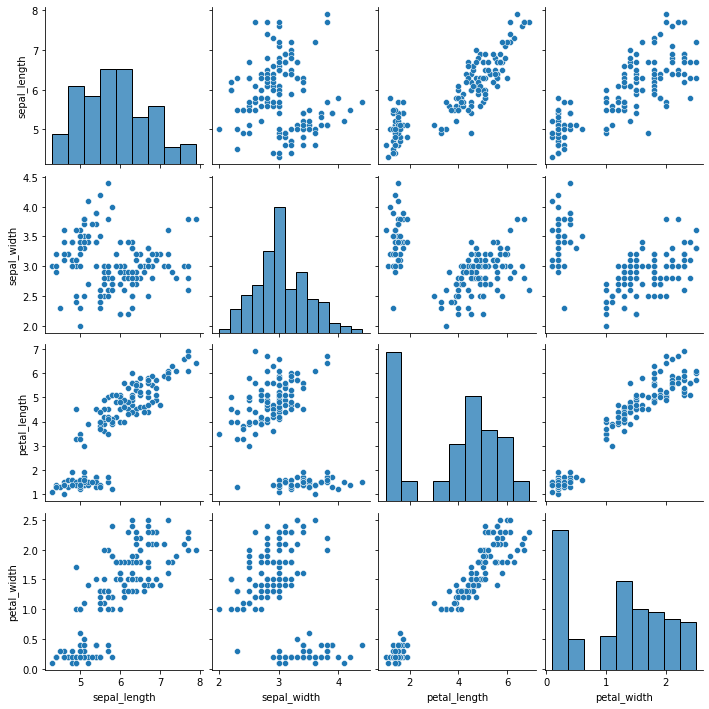

In [56]:
sns.pairplot(df);

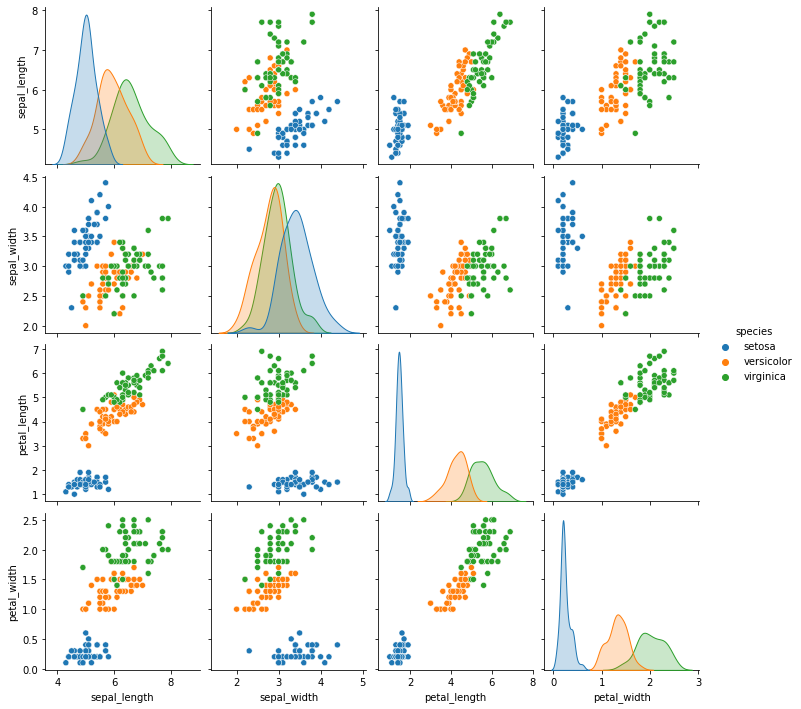

In [57]:
sns.pairplot(df,hue="species");

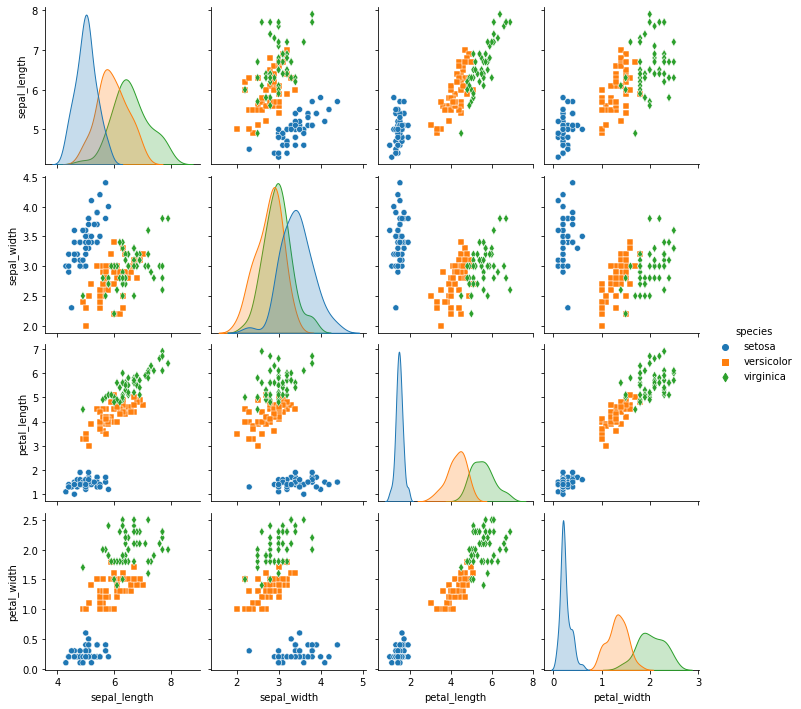

In [60]:
sns.pairplot(df,hue="species",markers=["o","s","d"]);

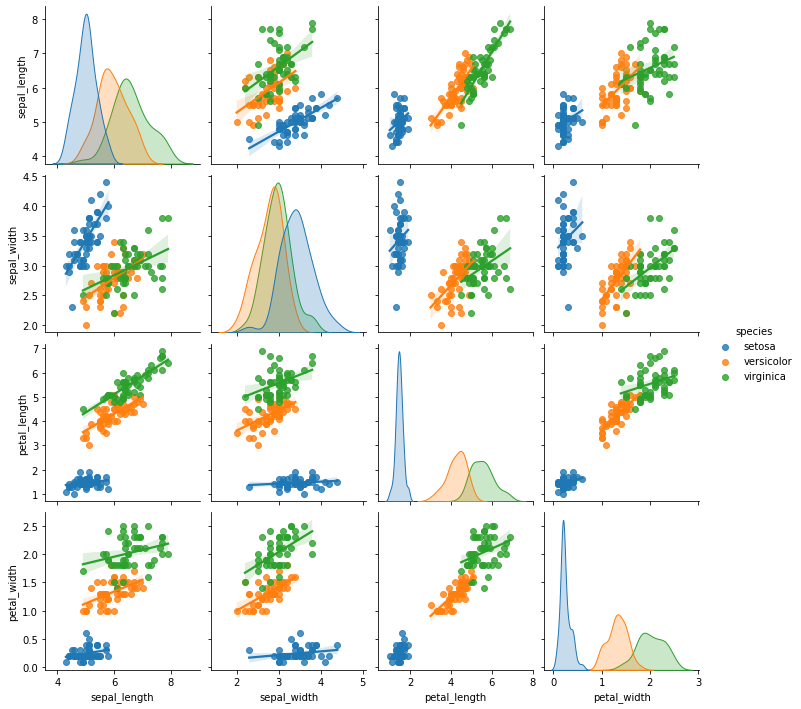

In [61]:
sns.pairplot(df,kind="reg",hue="species");

In [70]:
#Isı Haritası (Heat Map)
import seaborn as sns 
flights =sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [71]:
df.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [72]:
df.shape

(144, 3)

In [73]:
df=df.pivot("month","year","passengers");
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


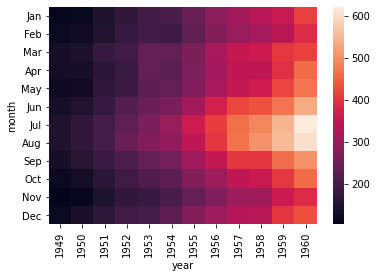

In [74]:
sns.heatmap(df)

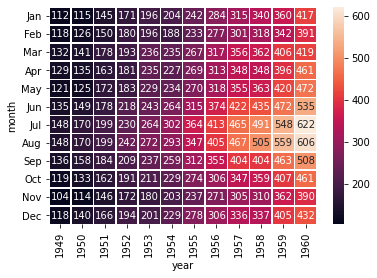

In [75]:
sns.heatmap(df,annot=True,fmt="d",linewidths=.5);

In [76]:
#Line Graph
#Zamana bağı veya IoT ile makinelerin ürettiği belirsiz datalarda kullanılır
import seaborn as sns
fmri=sns.load_dataset("fmri")
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [77]:
df.shape

(1064, 5)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [79]:
df.timepoint.describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [80]:
df.signal.describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [82]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [84]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [88]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


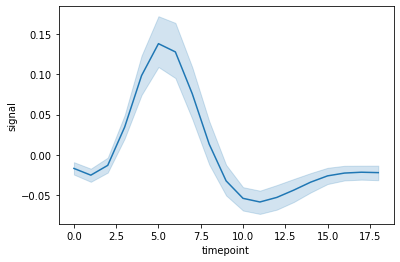

In [89]:
sns.lineplot(x="timepoint",y="signal",data=df); 

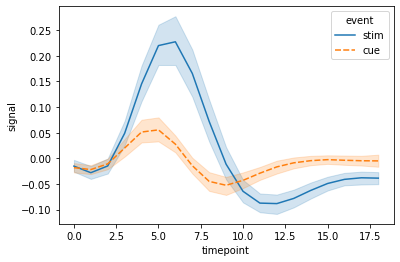

In [91]:
sns.lineplot(x="timepoint",y="signal",hue="event",style="event",data=df); 

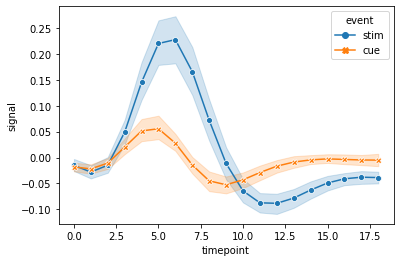

In [92]:
sns.lineplot(x="timepoint",y="signal",hue="event",style="event",
             markers=True,dashes=False,data=df); 

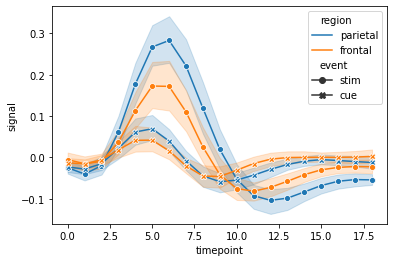

In [93]:
sns.lineplot(x="timepoint",y="signal",hue="region",style="event",
             markers=True,dashes=False,data=df); 

In [94]:
#Simple Time Series Graph
!pip install pandas_datareader
import pandas_datareader as pr

In [114]:
#Apple'ın zamana göre borsadaki hisse senedi değerleri
df=pr.get_data_yahoo("AAPL",start="2020-01-01",end="2021-01-01")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385


In [115]:
df.tail() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.520477
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020


In [97]:
df.shape

(253, 6)

In [116]:
close_time=df.Close
close_time.head()

Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64

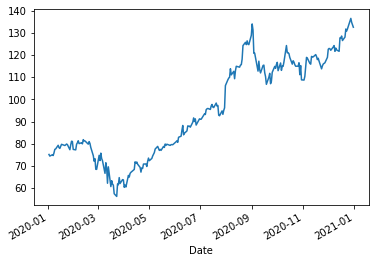

In [117]:
close_time.plot();

In [118]:
close_time.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [119]:
#Eğer yukarıdaki gibi tanımlı değilse
import pandas as pd
close_time.index=pd.DatetimeIndex(close_time.index)
close_time.head()

Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64

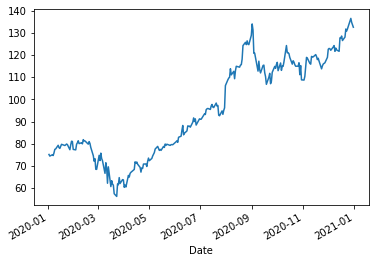

In [120]:
close_time.plot();